In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Al_MechanicalProp_dataset - Raw data.csv'
df = pd.read_csv(file_path, skiprows=3)

print(df.head())

   Unnamed: 0    Zn    Mg   Cu      Zr   Ti   Fe   Si   Casting Types  \
0         NaN   NaN   NaN  NaN     NaN  NaN  NaN  NaN  Permanent mold   
1         1.0  7.95  1.91  2.5  0.099     -    -    -               O   
2         2.0  7.95  1.91  2.5  0.099     -    -    -               O   
3         3.0  7.95  1.91  2.5  0.099     -    -    -               O   
4         4.0  7.95  1.91  2.5  0.099     -    -    -               O   

  Unnamed: 9 Homogenization (℃/h) Extrusion Solution Treatment (℃/h)  \
0     Billet                  NaN       O/X                      NaN   
1        NaN               450/24         X                      NaN   
2        NaN               450/24         X                      NaN   
3        NaN               450/24         X                      NaN   
4        NaN               450/24         X                      NaN   

  Aging (℃/h) Tensile properties Unnamed: 15 Unnamed: 16 Remarks Specimens  
0         NaN           YS (MPa)    TS (MPa)      E

In [ ]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 9"])

df.columns = [
    "Zn", "Mg", "Cu", "Zr", "Ti", "Fe", "Si",
    "Casting_Type", "Homogenization", "Extrusion",
    "Solution_Treatment", "Aging", "YS_MPa", "TS_MPa",
    "EL_Percent", "Remarks", "Specimens"
]

df = df.fillna(0)
df.head()

,Zn,Mg,Cu,Zr,Ti,Fe,Si,Casting_Type,Homogenization,Extrusion,Solution_Treatment,Aging,YS_MPa,TS_MPa,EL_Percent,Remarks,Specimens
0,0.00,0.00,0.0,0,0,0,0,Permanent mold,0,O/X,0,0,YS (MPa),TS (MPa),EL (%),0,0
1,7.95,1.91,2.5,0.099,-,-,-,O,450/24,X,0,0,204,252,1.4,0,7KA1
2,7.95,1.91,2.5,0.099,-,-,-,O,450/24,X,0,0,194,253,1.9,0,7KA1
3,7.95,1.91,2.5,0.099,-,-,-,O,450/24,X,0,0,196,255,1.8,0,7KA1
4,7.95,1.91,2.5,0.099,-,-,-,O,450/24,X,0,0,195,271,2.6,0,7KA1


In [ ]:
df['Casting_Type'] = df['Casting_Type'].apply(lambda x: 1 if x == 'Billet' else 0)
df

,Zn,Mg,Cu,Zr,Ti,Fe,Si,Casting_Type,Homogenization,Extrusion,Solution_Treatment,Aging,YS_MPa,TS_MPa,EL_Percent,Remarks,Specimens
0,0.00,0.00,0.00,0,0,0,0,0,0,O/X,0,0,YS (MPa),TS (MPa),EL (%),0,0
1,7.95,1.91,2.50,0.099,-,-,-,0,450/24,X,0,0,204,252,1.4,0,7KA1
2,7.95,1.91,2.50,0.099,-,-,-,0,450/24,X,0,0,194,253,1.9,0,7KA1
3,7.95,1.91,2.50,0.099,-,-,-,0,450/24,X,0,0,196,255,1.8,0,7KA1
4,7.95,1.91,2.50,0.099,-,-,-,0,450/24,X,0,0,195,271,2.6,0,7KA1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,7.46,2.40,1.92,0.100,0.026,0.120,0.027,0,460/48,O,480/2,150/48,703,749,14.0,0,Saif
224,7.46,2.40,1.92,0.100,0.026,0.120,0.027,0,460/48,O,480/2,150/48,641,719,13.0,0,Saif
225,7.46,2.40,1.92,0.100,0.026,0.120,0.027,0,460/48,O,480/2,150/72,615,639,15.0,0,Saif
226,7.46,2.40,1.92,0.100,0.026,0.120,0.027,0,460/48,O,480/2,150/72,620,642,17.0,0,Saif


In [ ]:
df['Extrusion'] = df['Extrusion'].apply(lambda x: 1 if x in ['X', 'O/X'] else 0)
df['Homogenization'] = df['Homogenization'].apply(lambda x: 1 if x != 0 else 0)
df['Solution_Treatment'] = df['Solution_Treatment'].apply(lambda x: 1 if x != 0 else 0)
df['Aging'] = df['Aging'].apply(lambda x: 1 if x != 0 else 0)
df

,Zn,Mg,Cu,Zr,Ti,Fe,Si,Casting_Type,Homogenization,Extrusion,Solution_Treatment,Aging,YS_MPa,TS_MPa,EL_Percent,Remarks,Specimens
0,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,YS (MPa),TS (MPa),EL (%),0,0
1,7.95,1.91,2.50,0.099,-,-,-,0,1,1,0,0,204,252,1.4,0,7KA1
2,7.95,1.91,2.50,0.099,-,-,-,0,1,1,0,0,194,253,1.9,0,7KA1
3,7.95,1.91,2.50,0.099,-,-,-,0,1,1,0,0,196,255,1.8,0,7KA1
4,7.95,1.91,2.50,0.099,-,-,-,0,1,1,0,0,195,271,2.6,0,7KA1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,7.46,2.40,1.92,0.100,0.026,0.120,0.027,0,1,0,1,1,703,749,14.0,0,Saif
224,7.46,2.40,1.92,0.100,0.026,0.120,0.027,0,1,0,1,1,641,719,13.0,0,Saif
225,7.46,2.40,1.92,0.100,0.026,0.120,0.027,0,1,0,1,1,615,639,15.0,0,Saif
226,7.46,2.40,1.92,0.100,0.026,0.120,0.027,0,1,0,1,1,620,642,17.0,0,Saif


In [ ]:

numeric_columns = ["Zn", "Mg", "Cu", "Zr", "Ti", "Fe", "Si", "YS_MPa", "TS_MPa", "EL_Percent"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


df.reset_index(drop=True, inplace=True)
df = df.drop(0).reset_index(drop=True)

In [ ]:
df

,Zn,Mg,Cu,Zr,Ti,Fe,Si,Casting_Type,Homogenization,Extrusion,Solution_Treatment,Aging,YS_MPa,TS_MPa,EL_Percent,Remarks,Specimens
0,7.95,1.91,2.50,0.099,0.000,0.00,0.000,0,1,1,0,0,204.0,252.0,1.4,0,7KA1
1,7.95,1.91,2.50,0.099,0.000,0.00,0.000,0,1,1,0,0,194.0,253.0,1.9,0,7KA1
2,7.95,1.91,2.50,0.099,0.000,0.00,0.000,0,1,1,0,0,196.0,255.0,1.8,0,7KA1
3,7.95,1.91,2.50,0.099,0.000,0.00,0.000,0,1,1,0,0,195.0,271.0,2.6,0,7KA1
4,7.95,2.00,2.50,0.095,0.000,0.00,0.000,0,1,1,0,0,107.0,209.0,4.4,0,7KA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,7.46,2.40,1.92,0.100,0.026,0.12,0.027,0,1,0,1,1,703.0,749.0,14.0,0,Saif
223,7.46,2.40,1.92,0.100,0.026,0.12,0.027,0,1,0,1,1,641.0,719.0,13.0,0,Saif
224,7.46,2.40,1.92,0.100,0.026,0.12,0.027,0,1,0,1,1,615.0,639.0,15.0,0,Saif
225,7.46,2.40,1.92,0.100,0.026,0.12,0.027,0,1,0,1,1,620.0,642.0,17.0,0,Saif


In [ ]:

import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


def train_rf(X_train, y_train, X_test):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    return rf_preds


def train_xgb(X_train, y_train, X_test):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)
    xgb_params = {
        'objective': 'reg:squarederror',
        'max_depth': 6,
        'learning_rate': 0.1,
        'n_estimators': 100
    }
    xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)
    xgb_preds = xgb_model.predict(dtest)
    return xgb_preds

def evaluate_model(y_test, preds):
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    accuracy = 100 - (mae / y_test.mean() * 100)
    return mse, mae, r2, accuracy


In [ ]:

targets = ["YS_MPa", "TS_MPa", "EL_Percent"]


X = df.drop(columns=targets + ["Remarks", "Specimens"])


for target in targets:
    y = df[target]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    rf_preds = train_rf(X_train, y_train, X_test)
    rf_mse, rf_mae, rf_r2, rf_accuracy = evaluate_model(y_test, rf_preds)


    xgb_preds = train_xgb(X_train, y_train, X_test)
    xgb_mse, xgb_mae, xgb_r2, xgb_accuracy = evaluate_model(y_test, xgb_preds)


    print(f"\nTarget: {target} - Random Forest")
    print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
    print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
    print(f"R^2 Score: {rf_r2:.2f}")
    print(f"Accuracy: {rf_accuracy:.2f}%")

    print(f"\nTarget: {target} - XGBoost")
    print(f"Mean Squared Error (MSE): {xgb_mse:.2f}")
    print(f"Mean Absolute Error (MAE): {xgb_mae:.2f}")
    print(f"R^2 Score: {xgb_r2:.2f}")
    print(f"Accuracy: {xgb_accuracy:.2f}%")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Target: YS_MPa - Random Forest
Mean Squared Error (MSE): 2284.60
Mean Absolute Error (MAE): 30.43
R^2 Score: 0.91
Accuracy: 92.91%

Target: YS_MPa - XGBoost
Mean Squared Error (MSE): 2160.92
Mean Absolute Error (MAE): 26.33
R^2 Score: 0.91
Accuracy: 93.86%


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Target: TS_MPa - Random Forest
Mean Squared Error (MSE): 1880.33
Mean Absolute Error (MAE): 25.59
R^2 Score: 0.88
Accuracy: 94.99%

Target: TS_MPa - XGBoost
Mean Squared Error (MSE): 1606.76
Mean Absolute Error (MAE): 21.74
R^2 Score: 0.90
Accuracy: 95.75%

Target: EL_Percent - Random Forest
Mean Squared Error (MSE): 5.26
Mean Absolute Error (MAE): 1.62
R^2 Score: 0.95
Accuracy: 87.91%

Target: EL_Percent - XGBoost
Mean Squared Error (MSE): 8.24
Mean Absolute Error (MAE): 1.61
R^2 Score: 0.92
Accuracy: 88.03%


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:05:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:06:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:06:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:06:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


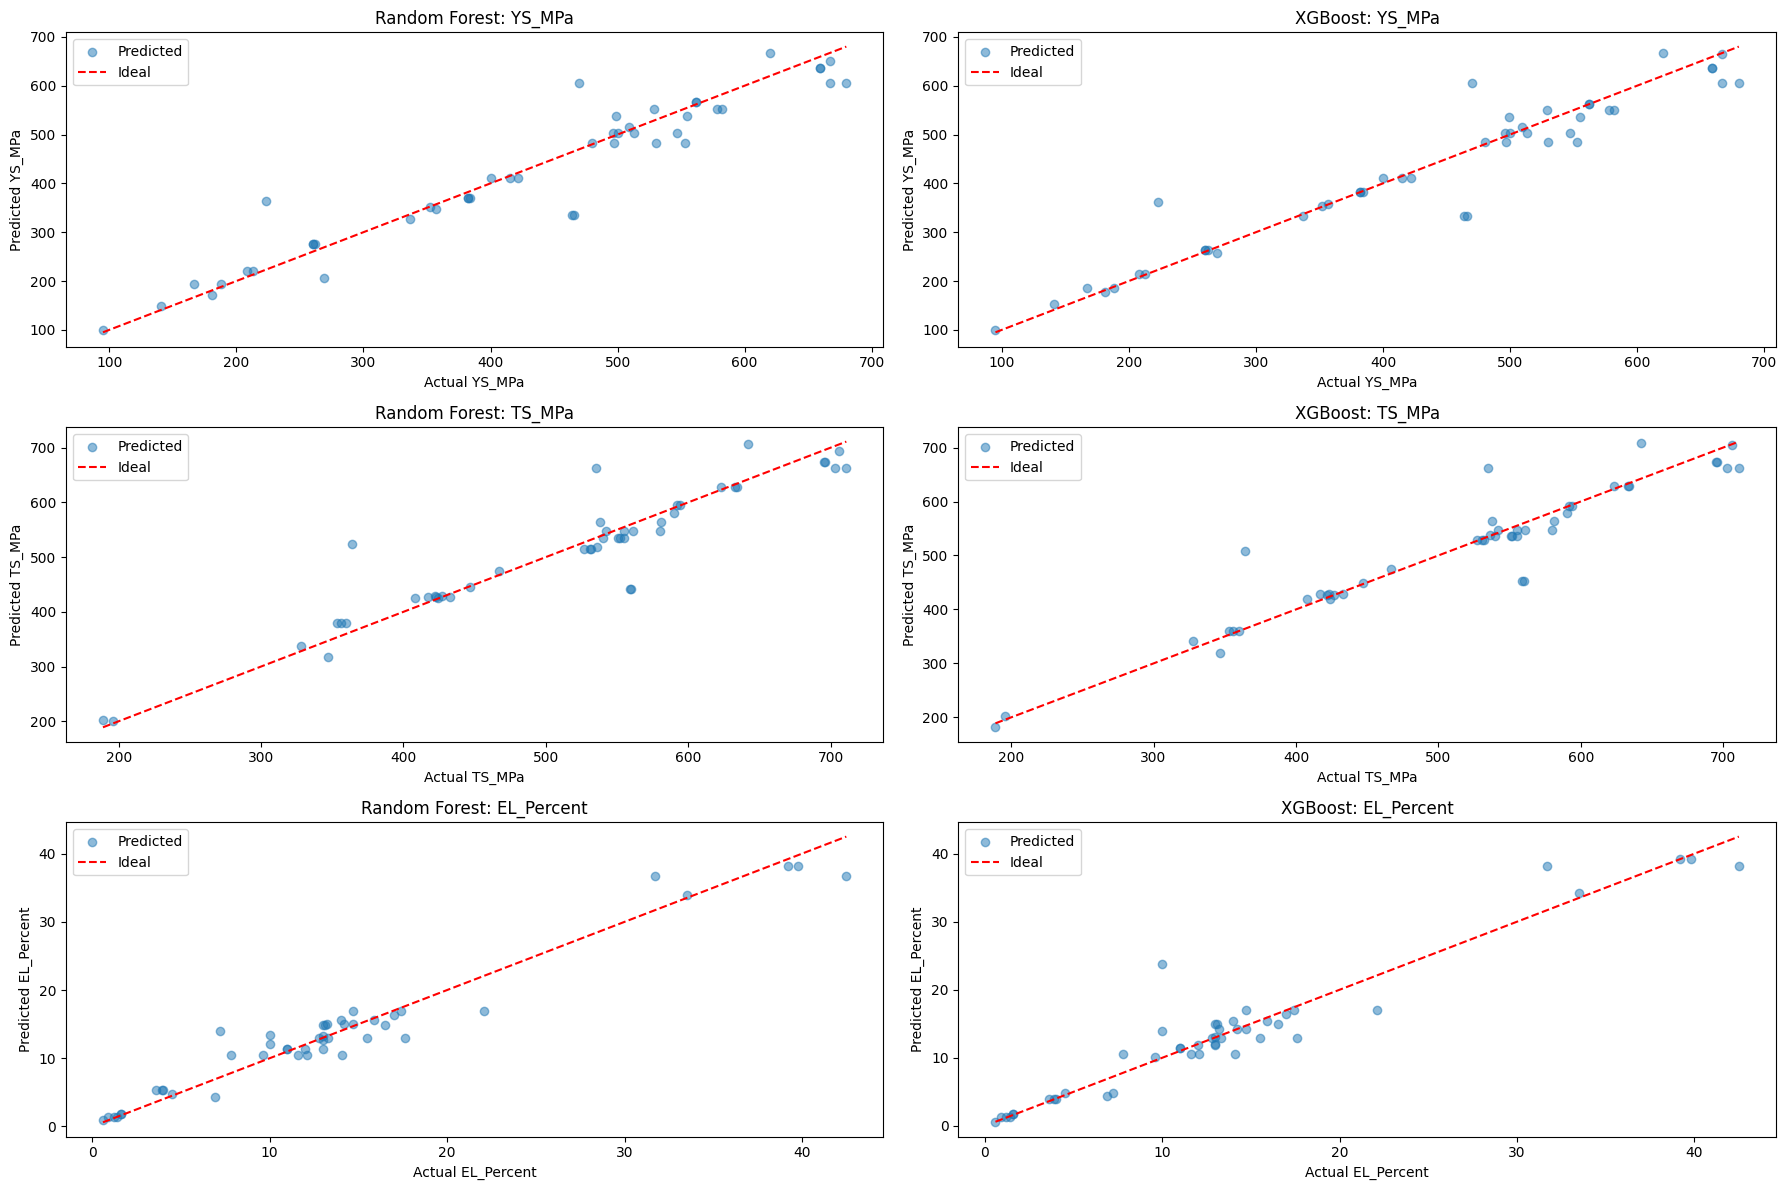

In [ ]:
# Initialize the plot
plt.figure(figsize=(18, 12))

# Loop through each target and plot results
for i, target in enumerate(targets):
    y = df[target]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest predictions
    rf_preds = train_rf(X_train, y_train, X_test)

    # XGBoost predictions
    xgb_preds = train_xgb(X_train, y_train, X_test)

    # Plot Random Forest predictions
    plt.subplot(3, 2, 2 * i + 1)
    plt.scatter(y_test, rf_preds, alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'Random Forest: {target}')
    plt.legend()

    # Plot XGBoost predictions
    plt.subplot(3, 2, 2 * i + 2)
    plt.scatter(y_test, xgb_preds, alpha=0.5, label='Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'XGBoost: {target}')
    plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
